# Kurapati Venkatesh
# 09012021
# Topic: k - Nearest Neighbors(kNN)

# ---------------------------------------------------------------------------

## Problem Statement:

## A glass manufacturing plant, uses different Earth elements to design a new glass based on customer requirements for that they would like to automate the process of classification as it’s a tedious job to manually classify it, help the company reach its objective by correctly classifying the Earth elements, by using KNN Algorithm

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To classify new data point using KNN Algorithm

## -------------------------------------------------------------------------------------------

##### Data Set Information:

##### This is a Glass Identification Data Set from UCI. It contains 10 attributes. The response is glass type(discrete 7 values)

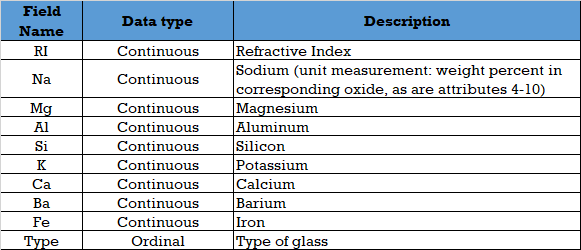

##### * Type of glass: (class attribute)
- 1 buildingwindowsfloatprocessed
- 2 buildingwindowsnonfloatprocessed
- 3 vehiclewindowsfloatprocessed
- 4 vehiclewindowsnonfloatprocessed (none in this database)
- 5 containers
- 6 tableware
- 7 headlamps
About Type 2,4 -> Float processed glass means they are made on a floating molten glass on a bed of molten metal, this gives the sheet uniform thickness and flat surfaces.

## ---------------------------------------------------------------------------------------------------------------------------

## Load dependencies and data:

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
#load data
df = pd.read_csv(r"G:\360digit\assignments meterial\ML-KNN\glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# value count for glass types
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## Data exploration and visualizaion:

### correlation matrix:

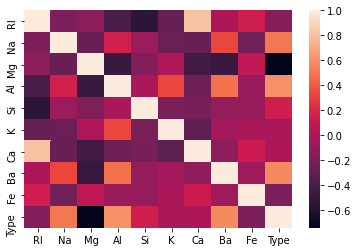

In [5]:
cor = df.corr()
sns.heatmap(cor)

* We can notice that Ca and K values don't affect Type that much.

* Also Ca and RI are highly correlated, this means using only RI is enough.

* So we can go ahead and drop Ca, and also K.(performed later)

### Scatter plot of two features, and pairwise plot:

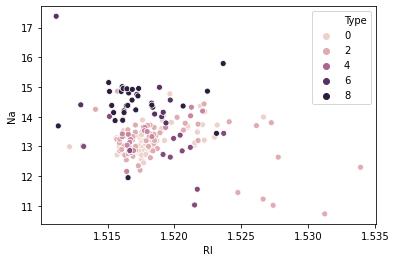

In [8]:
sns.scatterplot(df['RI'],df['Na'],hue=df['Type'])

Suppose we consider only RI, and Na values for classification for glass type.

* From the above plot, We first calculate the nearest neighbors from the new data point to be calculated.
* If the majority of nearest neighbors belong to a particular class, say type 4, then we classify the data point as type 4.

But there are a lot more than two features based on which we can classify. So let us take a look at pairwise plot to capture all the features.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


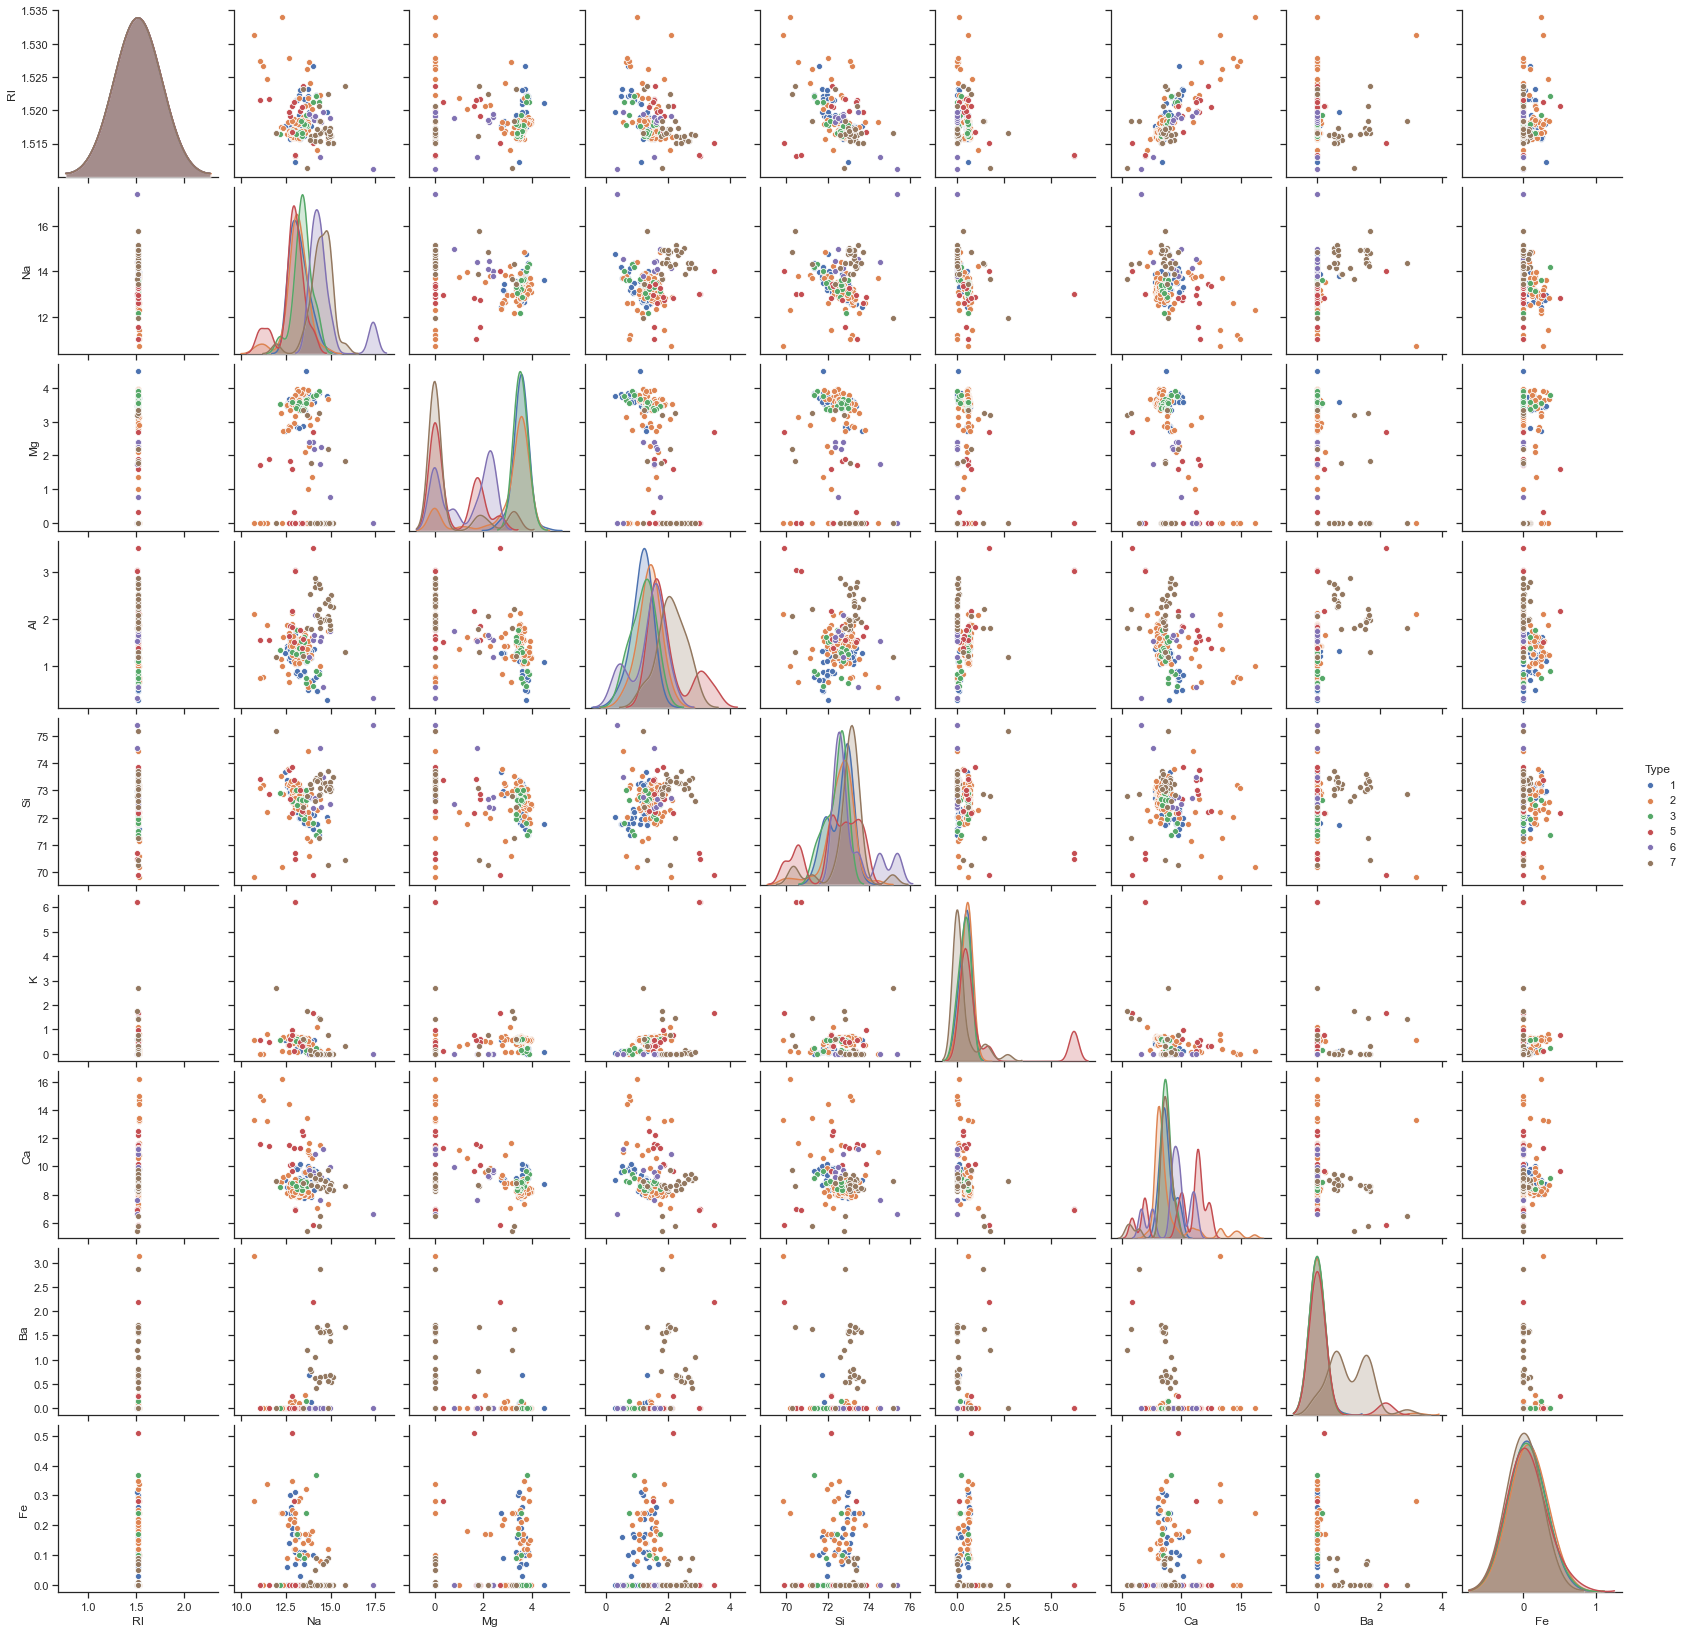

In [15]:
#pairwise plot of all the features
sns.pairplot(df ,hue='Type', diag_kws={'bw': 0.25})
plt.show()

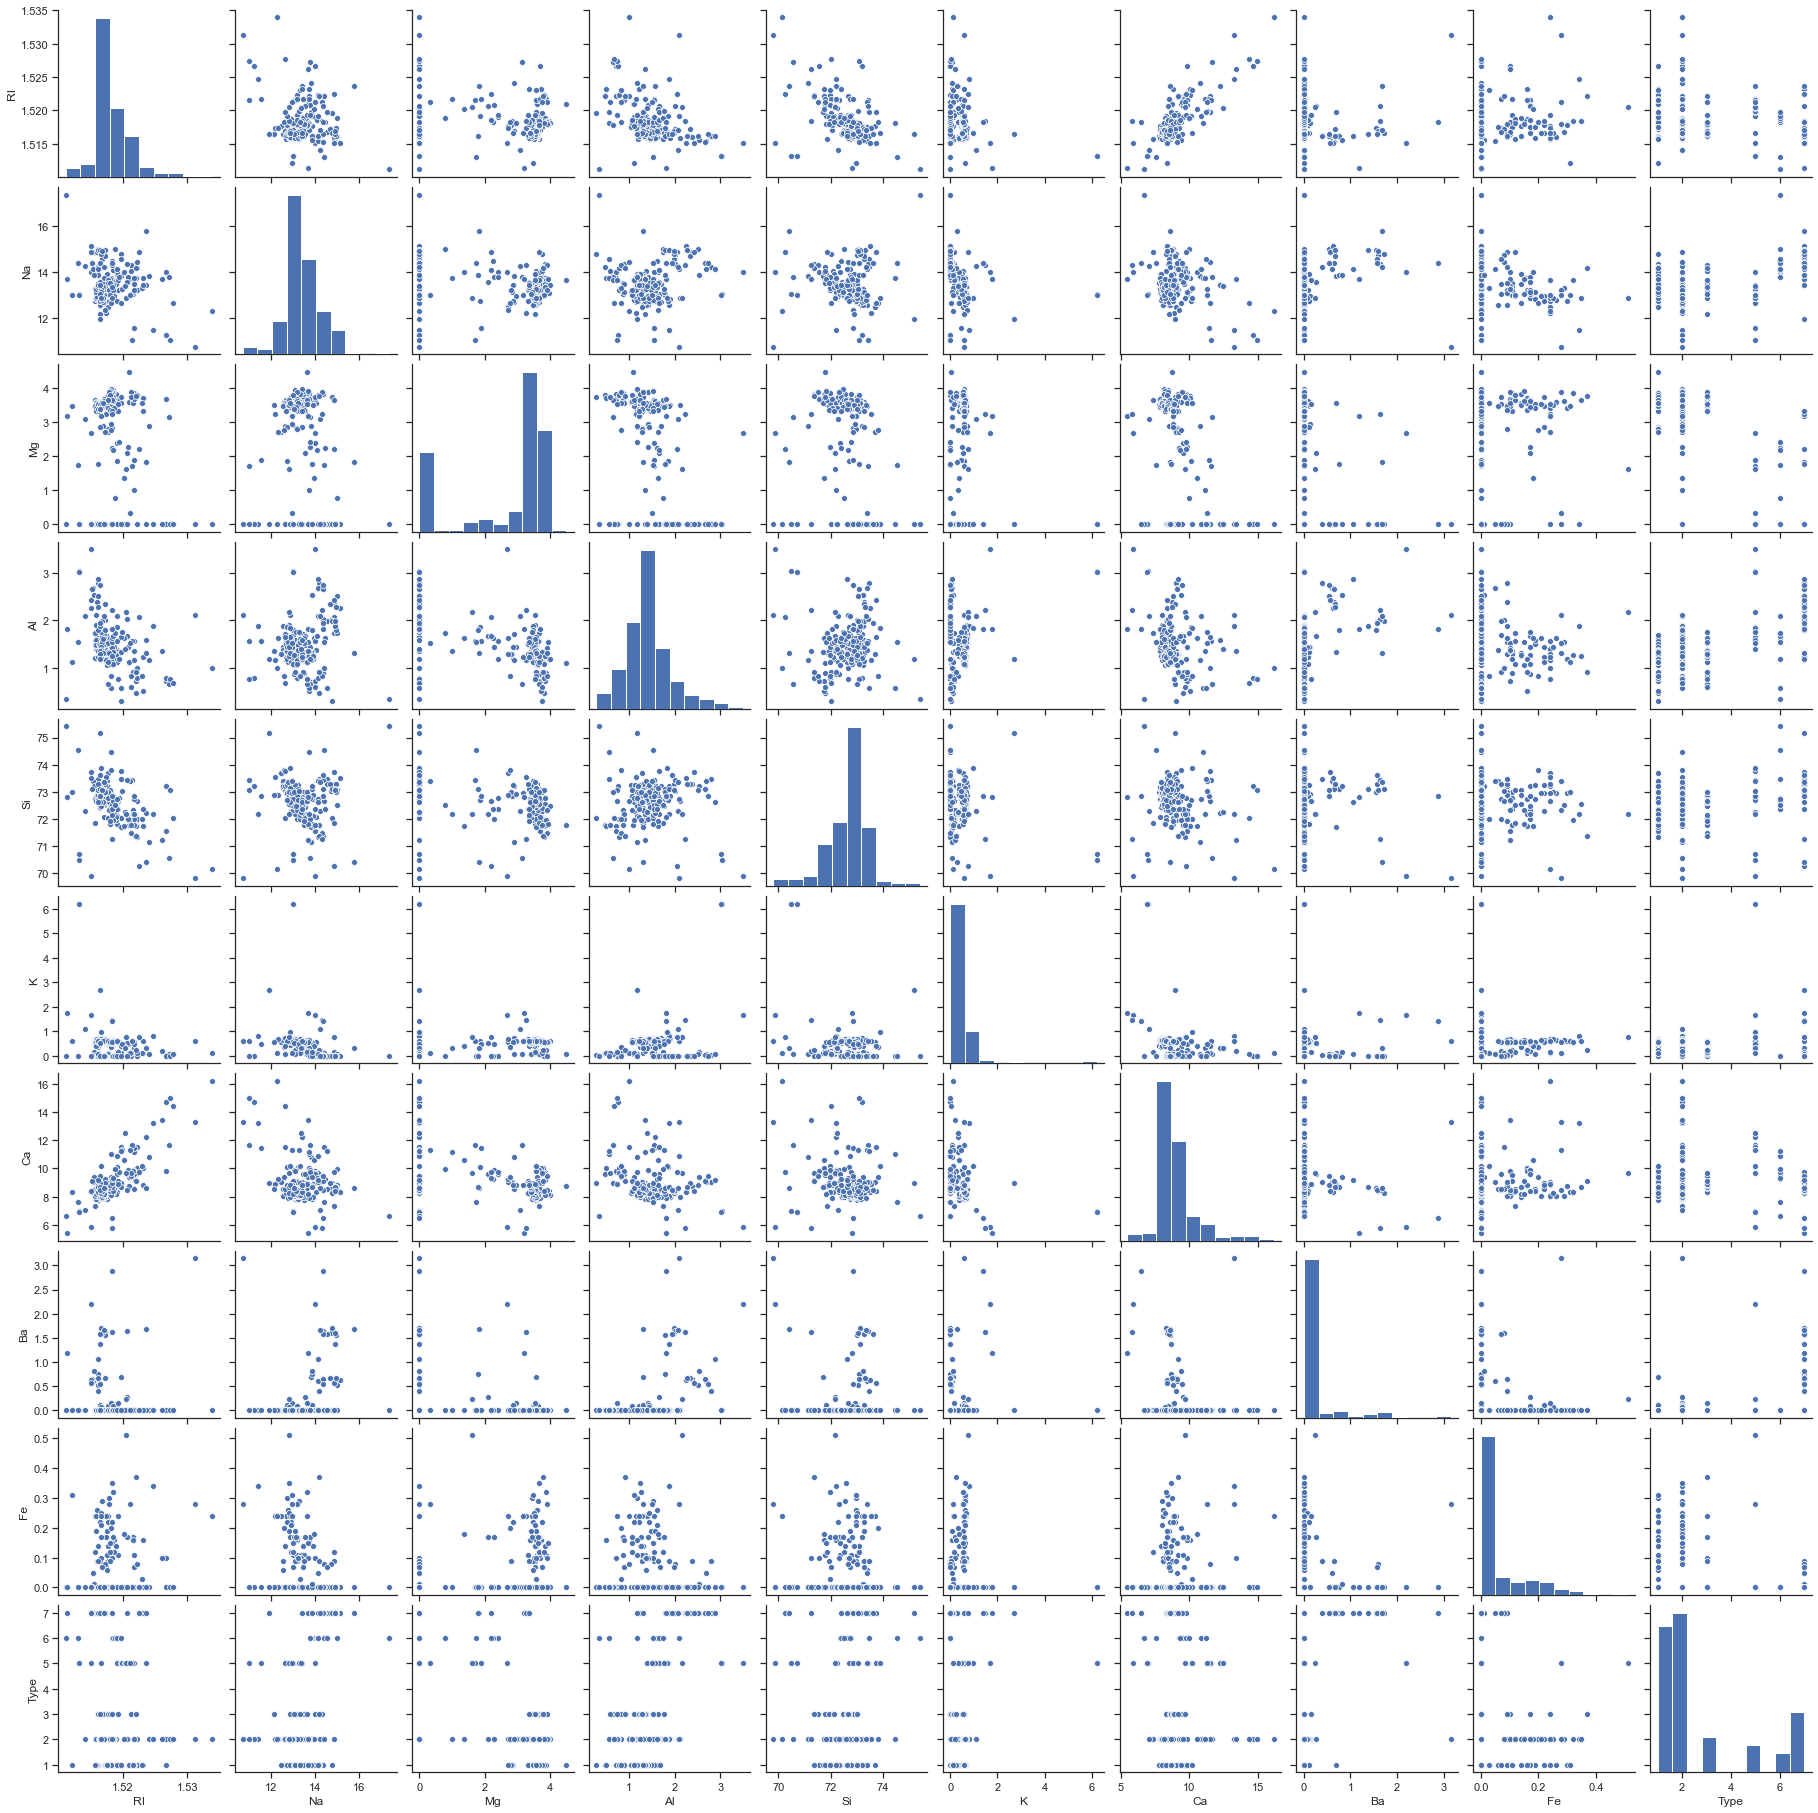

In [11]:
#pairwise plot of all the features
import seaborn as sns

sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df)


import matplotlib.pyplot as plt
plt.show()


The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types.

## --------------------------------------------------------------------------------------------

### Scaling:

In [17]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [19]:
# Normalized data frame (dropping the Type column)
df_n = norm_func(df.iloc[:, :9])
df_n.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X = np.array(df_n.iloc[:,:]) # Predictors 

In [21]:
Y = np.array(df['Type']) # Target 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### Applying KNN:

* Drop features that are not required( not done )
* Use random state while splitting the data to ensure reproducibility and consistency
* Experiment with distance metrics - Euclidean, manhattan

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=21)

In [24]:
pred = knn.predict(X_test)
pred

array([2, 2, 1, 6, 2, 2, 1, 2, 2, 2, 7, 2, 7, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       6, 2, 2, 1, 7, 1, 1, 7, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

### Evaluate the model:

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred))
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 

0.627906976744186


Predictions,1,2,6,7
Actual,,,,
1,10,2,0,0
2,4,14,0,0
3,3,2,0,0
5,1,1,2,1
7,0,0,0,3


#### error on train data:

In [26]:
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train, pred_train))
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

0.6374269005847953


Predictions,1,2,6,7
Actual,,,,
1,50,8,0,0
2,17,37,3,1
3,7,5,0,0
5,1,2,0,5
6,4,1,1,3
7,2,2,1,21


In [27]:
# creating empty list variable 
acc = []

* running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and storing the accuracy values

In [29]:
for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])

##### train accuracy plot:

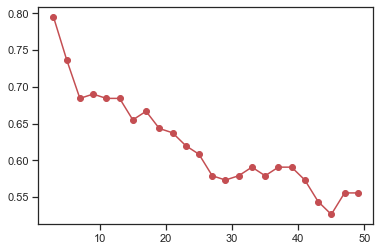

In [30]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

##### test accuracy plot:

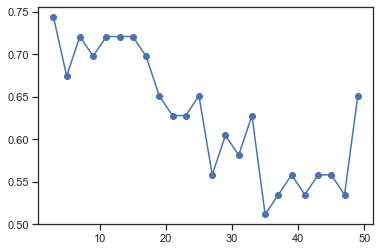

In [31]:
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")

###### From the above plots, it's clear that the initial values of k yeilds best test and train accuracy scores. For better understanding, we will try this algorithm in different way as follows.

## ---------------------------------------------------------------------------------------------------------

##  we can do this in another way

## --------------------------------------------------------------------------------------------------------------

### Feature Scaling

Scaling is necessary for distance-based algorithms such as KNN. This is to avoid higher weightage being assigned to data with a higher magnitude.

* Using standard scaler we can scale down to unit variance.

##### Formula:

* z = (x - u) / s

* where x -> value, u -> mean, s -> standard deviation

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler()

In [35]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [36]:
#perform transformation
scaled_features = scaler.transform(df.drop('Type',axis=1))
scaled_features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [37]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


## Applying KNN:

* Drop features that are not required
* Use random state while splitting the data to ensure reproducibility and consistency
* Experiment with distance metrics - Euclidean, manhattan

In [38]:
dff = df_feat.drop(['Ca','K'],axis=1) #Removing features - Ca and K 

In [39]:
X_train,X_test,y_train,y_test  = train_test_split(dff,df['Type'],test_size=0.3,random_state=45)
#setting random state ensures split is same eveytime, so that the results are comparable

In [40]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [42]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [43]:
y_pred = knn.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.90      0.78        20
           2       0.85      0.65      0.74        26
           3       0.00      0.00      0.00         3
           5       0.25      1.00      0.40         1
           6       0.50      0.50      0.50         2
           7       1.00      0.85      0.92        13

    accuracy                           0.74        65
   macro avg       0.55      0.65      0.56        65
weighted avg       0.77      0.74      0.74        65



With this setup, We found the accuracy to be 74%

#### Finding the best K value:

We can do this either -

* by plotting Accuracy
* or by plotting the error rate

Note that plotting both is not required

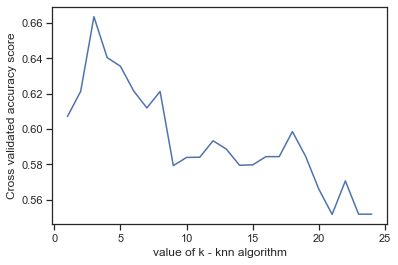

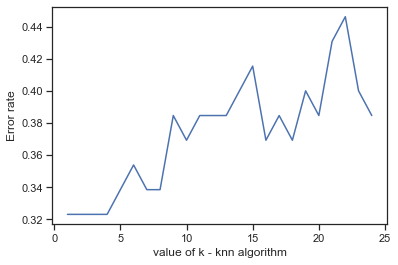

In [45]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,dff,df['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

##### we can see that k=4 produces the most accurate results

### Findings :-

* Manhattan distance produced better results (improved accuracy - more than 5%)
* Applying feature scaling improved accuracy by almost 5%.
* The best k value was found to be 4.
* Dropping ‘Ca’ produced better results by a bit, ‘K’ feature did not affect results in any way.
* Also, we noticed that RI and Ca are highly correlated, this makes sense as it was found that the Refractive index of glass was found to increase with the increase in Cao

#### Further improvements :-

We can see that the model can be improved further so we get better accuracy. 

Some suggestions -

* Using KFold Cross-validation
* Try different algorithms to find the best one for this problem - (SVM, Random forest, etc)